<a href="https://colab.research.google.com/github/shionguha/inf2178-expdesignfordatascience-w23/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

In [2]:
import pandas as pd

#
# Convert into a data frame
#
# Extract the data
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
# Extract the target
target = pd.DataFrame(wine['target'], columns=['cultivator'])
# Combine into one dataset
df = pd.concat([target, data], axis='columns')

In [3]:
# Trim the data
df = df[['cultivator', 'total_phenols']]

# Display the first 5 columns
print(df.head())

   cultivator  total_phenols
0           0           2.80
1           0           2.65
2           0           2.80
3           0           3.85
4           0           2.80


In [4]:
# Number of rows
print(df.shape[0])

178


In [5]:
# Cultivators' names
print(df['cultivator'].unique())

[0 1 2]


Text(0, 0.5, 'Total Phenols')

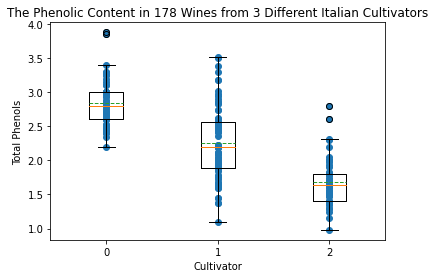

In [6]:
import matplotlib.pyplot as plt

# Plot
grouped_data = df.groupby('cultivator')['total_phenols'].apply(list)
plt.boxplot(grouped_data, positions=range(0, len(df['cultivator'].unique())), showmeans=True, meanline=True)
plt.scatter(df['cultivator'], df['total_phenols'])
plt.title('The Phenolic Content in 178 Wines from 3 Different Italian Cultivators')
plt.xlabel('Cultivator')
plt.ylabel('Total Phenols')

In [7]:
# Samples
sample_0 = df[df['cultivator'] == 0]['total_phenols']
sample_1 = df[df['cultivator'] == 1]['total_phenols']
sample_2 = df[df['cultivator'] == 2]['total_phenols']

In [8]:
from scipy.stats import f_oneway

# One-way ANOVA
statistic, pvalue = f_oneway(sample_0, sample_1, sample_2)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 93.73300962036718, p = 2.1376700154385954e-28


In [9]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

The p-value is <0.001 (***)
